## Imports

In [120]:
%matplotlib inline

import os
import certifi
import arcpy

# set default gdal and ertifi envs (non-dev)
try:
    install_dir = arcpy.GetInstallInfo().get('InstallDir')  # get arcgis install dir
    os.environ['GDAL_DATA'] = os.path.join(install_dir, 'Resources\pedata\gdaldata')  # join to gdal install
    os.environ.setdefault("CURL_CA_BUNDLE", certifi.where())  # set certifi
except:
    arcpy.AddError('Could not get install directory for ArcGIS Pro or set certifi.')
    raise
    
# globals (dev)
FOLDER_MODULES = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\modules'  
FOLDER_SHARED = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\shared'
GRP_LYR_FILE = r"C:\Users\Lewis\Documents\GitHub\tenement-tools\arc\lyr\group_template.lyrx"

# set gdal global environ
import os
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS '] = 'tif'
os.environ['VSI_CACHE '] = 'TRUE'
os.environ['GDAL_HTTP_MULTIRANGE '] = 'YES'
os.environ['GDAL_HTTP_MERGE_CONSECUTIVE_RANGES '] = 'YES'

# also set rasterio env variables
rasterio_env = {
    'GDAL_DISABLE_READDIR_ON_OPEN': 'EMPTY_DIR',
    'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': 'tif',
    'VSI_CACHE': True,
    'GDAL_HTTP_MULTIRANGE': 'YES',
    'GDAL_HTTP_MERGE_CONSECUTIVE_RANGES': 'YES'
}

# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# safe imports
import sys                  # arcgis comes with these
import datetime                 # arcgis comes with these
import numpy as np              # arcgis comes with these
import arcpy                    # arcgis comes with these
import matplotlib.pyplot as plt
from datetime import datetime   # arcgis comes with these

# risky imports (not native to arcgis)
try:
    from osgeo import gdal
    from osgeo import ogr
    from osgeo import osr
    import tempfile
    import xarray as xr
    import dask
    import rasterio
    import pystac_client
    from odc import stac
except:
    arcpy.AddError('Python libraries xarray, dask, rasterio, pystac, or odc not installed.')
    raise

# import tools
try:
    # shared folder
    sys.path.append(FOLDER_SHARED)
    import arc, satfetcher, tools

    # module folder
    sys.path.append(FOLDER_MODULES)
    import nrt, cog_odc, cog
except:
    arcpy.AddError('Could not find tenement tools python scripts (modules, shared).')
    raise

In [73]:
import pyproj

env_dir = Path(pyproj.__file__).parents[3]
prj_dir = os.path.join(env_dir, 'Library', 'share', 'proj')
pyproj.datadir.set_data_dir(prj_dir)

In [71]:
prj_dir

'C:\\Users\\Lewis\\AppData\\Local\\ESRI\\conda\\envs\\arcgispro-py3-dev-tool\\Library\\share\\proj'

In [59]:
env

'C:\\Users\\Lewis\\AppData\\Local\\ESRI\\conda\\envs\\arcgispro-py3-dev-tool'

In [121]:
from importlib import reload
reload(nrt)

<module 'nrt' from 'C:\\Users\\Lewis\\Documents\\GitHub\\tenement-tools\\modules\\nrt.py'>

## Create monitoring project

In [2]:
# user creates monitoring projects. includes gdb and folders for project structure

## Create monitoring areas

In [3]:
# user creates monitoring polygons and fills in info in each row of table

### Provisional working

In [160]:
# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=dask.array.core.PerformanceWarning)

# all provisional + non-provisional landsat
out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
s_year = '{}-01-01'.format(1990)
e_year = '{}-12-31'.format(datetime.now().year)
bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
in_epsg = 3577

# get params
params = nrt.get_satellite_params(platform='Landsat')

# open existing cube
ds_existing = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc")

# sync cube to now
ds_ls = nrt.sync_nrt_cube(out_nc=out_nc,
                          collections=params.get('collections'),
                          bands=params.get('bands'),
                          start_dt=s_year,
                          end_dt=e_year,
                          bbox=bbox,
                          in_epsg=in_epsg,
                          slc_off=False,
                          resolution=params.get('resolution'),
                          ds_existing=None,
                          chunks={})

Syncing cube for monitoring area: C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc
Beginning STAC search for items. This can take awhile.
Searching collection: ga_ls5t_ard_3
Searching collection: ga_ls7e_ard_3
Excluding SLC-off times.
Searching collection: ga_ls8c_ard_3
Searching collection: ga_ls8c_ard_provisional_3
A total of 1195 scenes were found.
Replacing url prefix: s3://dea-public-data with https://data.dea.ga.gov.au
Converting raw STAC data into xarray dataset via odc-stac.
Created xarray dataset via odc-stac successfully.


In [4]:
# # non-provis
# out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
# s_year = '{}-01-01'.format(2000)
# e_year = '{}-12-31'.format(datetime.now().year)
# bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
# in_epsg = 3577

# params = nrt.get_satellite_params(platform='Landsat')  

In [5]:
# ds_existing = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc")

In [7]:
# # sync cube to now
# ds_np = nrt.sync_nrt_cube(out_nc=out_nc,
#                           collections=params.get('collections'),
#                           bands=params.get('bands'),
#                           start_dt=s_year,
#                           end_dt=e_year,
#                           bbox=bbox,
#                           in_epsg=in_epsg,
#                           slc_off=False,
#                           resolution=params.get('resolution'),
#                           ds_existing=None,
#                           chunks={})

In [163]:
# # provis
# out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
# s_year = '{}-01-01'.format(2000)
# e_year = '{}-12-31'.format(datetime.now().year)
# bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
# in_epsg = 3577

# params = nrt.get_satellite_params(platform='Landsat')  
# params.update({'collections': ['ga_ls7e_ard_provisional_3', 'ga_ls8c_ard_provisional_3']})

In [15]:
# # # sync cube to now
# ds_p = nrt.sync_nrt_cube(out_nc=out_nc,
#                          collections=params.get('collections'),
#                          bands=params.get('bands'),
#                          start_dt=s_year,
#                          end_dt=e_year,
#                          bbox=bbox,
#                          in_epsg=in_epsg,
#                          slc_off=False,
#                          resolution=params.get('resolution'),
#                          ds_existing=None,
#                          chunks={})

In [18]:
# ds_p.isel(time=-4).load().astype('int16')

In [117]:
# # provis
# out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
# s_year = '{}-01-01'.format(2000)
# e_year = '{}-12-31'.format(datetime.now().year)
# bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
# in_epsg = 3577

# params = nrt.get_satellite_params(platform='Landsat')  
# params.update({'collections': ['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls8c_ard_provisional_3']})

In [19]:
# # sync cube to now
# ds_b = nrt.sync_nrt_cube(out_nc=out_nc,
#                          collections=params.get('collections'),
#                          bands=params.get('bands'),
#                          start_dt=s_year,
#                          end_dt=e_year,
#                          bbox=bbox,
#                          in_epsg=in_epsg,
#                          slc_off=False,
#                          resolution=params.get('resolution'),
#                          ds_existing=ds_existing,
#                          chunks={})

In [148]:
# ds_np['ndvi'] = (ds_np['nbart_nir'] - ds_np['nbart_red']) / (ds_np['nbart_nir'] + ds_np['nbart_red'])
# ds_p['ndvi'] = (ds_p['nbart_nir'] - ds_p['nbart_red']) / (ds_p['nbart_nir'] + ds_p['nbart_red'])
# ds_b['ndvi'] = (ds_b['nbart_nir'] - ds_b['nbart_red']) / (ds_b['nbart_nir'] + ds_b['nbart_red'])

In [20]:
#ds_np['time'].values

In [21]:
#ds_p['time'].values

In [22]:
#ds_b['time'].values

In [23]:
# ds_np['ndvi'].isel(time=-2).compute().astype('float32')
# ds_np['ndvi'].isel(time=-2).plot()
# plt.show()

In [24]:
# ds_p['ndvi'].isel(time=-4).compute().astype('float32')
# ds_p['ndvi'].isel(time=-4).plot()
# plt.show()

In [25]:
# ds_b['ndvi'].isel(time=-4).compute().astype('float32')
# ds_b['ndvi'].isel(time=-4).plot()
# plt.show()

In [130]:
# non-provis
out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
s_year = '{}-01-01'.format(2000)
e_year = '{}-12-31'.format(datetime.now().year)
bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
in_epsg = 3577

params = nrt.get_satellite_params(platform='Sentinel') 
params.update({'collections': ['s2a_ard_granule', 's2b_ard_granule']})

In [131]:
ds_existing = xr.open_dataset(r"C:\Users\Lewis\Desktop\pandain\s2_np.nc")

In [132]:
# sync cube to now
ds_np = nrt.sync_nrt_cube(out_nc=out_nc,
                          collections=params.get('collections'),
                          bands=params.get('bands'),
                          start_dt=s_year,
                          end_dt=e_year,
                          bbox=bbox,
                          in_epsg=in_epsg,
                          slc_off=False,
                          resolution=params.get('resolution'),
                          ds_existing=None,
                          chunks={})

Syncing cube for monitoring area: C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc
Beginning STAC search for items. This can take awhile.
Searching collection: s2a_ard_granule
Searching collection: s2b_ard_granule
A total of 350 scenes were found.
Replacing url prefix: s3://dea-public-data with https://data.dea.ga.gov.au
Converting raw STAC data into xarray dataset via odc-stac.
Created xarray dataset via odc-stac successfully.


In [133]:
ds_np['time'].values

array(['2015-10-22T02:08:10.000000000', '2015-11-21T02:11:49.000000000',
       '2015-12-21T02:17:51.000000000', '2016-01-20T02:17:47.000000000',
       '2016-02-19T02:06:40.000000000', '2016-03-20T02:12:13.000000000',
       '2016-04-19T02:07:58.000000000', '2016-04-29T02:12:00.000000000',
       '2016-05-09T02:10:18.000000000', '2016-05-29T02:10:18.000000000',
       '2016-06-18T02:10:15.000000000', '2016-07-08T02:10:16.000000000',
       '2016-07-28T02:10:17.000000000', '2016-08-17T02:10:15.000000000',
       '2016-09-06T02:10:12.000000000', '2016-09-26T02:10:08.000000000',
       '2016-10-16T02:10:08.000000000', '2016-10-26T02:09:44.000000000',
       '2016-11-05T02:09:53.000000000', '2016-11-15T02:04:43.000000000',
       '2016-12-05T02:06:19.000000000', '2016-12-15T02:08:49.000000000',
       '2016-12-25T02:06:56.000000000', '2017-01-14T02:04:53.000000000',
       '2017-01-24T02:05:42.000000000', '2017-02-03T02:11:40.000000000',
       '2017-02-13T02:07:46.000000000', '2017-03-05

In [134]:
# provis
out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
s_year = '{}-01-01'.format(2000)
e_year = '{}-12-31'.format(datetime.now().year)
bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
in_epsg = 3577

params = nrt.get_satellite_params(platform='Sentinel_Provisional')  
params.update({'collections': ['ga_s2am_ard_provisional_3', 'ga_s2bm_ard_provisional_3']})

In [135]:
# sync cube to now
ds_p = nrt.sync_nrt_cube(out_nc=out_nc,
                         collections=params.get('collections'),
                         bands=params.get('bands'),
                         start_dt=s_year,
                         end_dt=e_year,
                         bbox=bbox,
                         in_epsg=in_epsg,
                         slc_off=False,
                         resolution=params.get('resolution'),
                         ds_existing=None,
                         chunks={})

Syncing cube for monitoring area: C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc
Beginning STAC search for items. This can take awhile.
Searching collection: ga_s2am_ard_provisional_3
Searching collection: ga_s2bm_ard_provisional_3
A total of 34 scenes were found.
Replacing url prefix: s3://dea-public-data with https://data.dea.ga.gov.au
Converting raw STAC data into xarray dataset via odc-stac.
Created xarray dataset via odc-stac successfully.


In [136]:
ds_p['time'].values

array(['2021-08-31T02:14:07.000000000', '2021-09-05T02:14:02.000000000',
       '2021-09-10T02:14:05.000000000', '2021-09-15T02:14:01.000000000',
       '2021-09-20T02:14:08.000000000', '2021-09-25T02:14:04.000000000',
       '2021-09-30T02:14:10.000000000', '2021-10-05T02:14:05.000000000',
       '2021-10-10T02:14:11.000000000', '2021-10-15T02:14:07.000000000',
       '2021-10-20T02:14:11.000000000', '2021-10-25T02:14:07.000000000',
       '2021-10-30T02:14:10.000000000', '2021-11-04T02:14:06.000000000',
       '2021-11-14T02:14:04.000000000', '2021-11-19T02:14:05.000000000',
       '2021-11-24T02:13:58.000000000', '2021-11-29T02:14:05.000000000',
       '2021-12-04T02:14:01.000000000', '2021-12-09T02:14:04.000000000',
       '2021-12-19T02:14:06.000000000', '2021-12-24T02:14:00.000000000',
       '2021-12-29T02:14:07.000000000', '2022-01-03T02:14:01.000000000',
       '2022-01-08T02:14:07.000000000', '2022-01-18T02:14:06.000000000',
       '2022-01-23T02:14:00.000000000', '2022-01-28

In [96]:
# ds_np['ndvi'] = (ds_np['nbart_nir_1'] - ds_np['nbart_red']) / (ds_np['nbart_nir_1'] + ds_np['nbart_red'])
# ds_p['ndvi'] = (ds_p['nbart_nir_1'] - ds_p['nbart_red']) / (ds_p['nbart_nir_1'] + ds_p['nbart_red'])

In [95]:
# ds_np['time'].values

In [92]:
# ds_np['ndvi'].isel(time=-10).compute().astype('float32')
# ds_np['ndvi'].isel(time=-10).plot()
# plt.show()

In [93]:
# ds_p['ndvi'].isel(time=-9).compute().astype('float32')
# ds_p['ndvi'].isel(time=-9).plot()
# plt.show()

In [94]:
# ds_p['time']

In [59]:
# sync cube to now
ds = nrt.sync_nrt_cube(out_nc=out_nc,
                       collections=params.get('collections'),
                       bands=params.get('bands'),
                       start_dt=s_year,
                       end_dt=e_year,
                       bbox=bbox,
                       in_epsg=in_epsg,
                       slc_off=False,
                       resolution=params.get('resolution'),
                       ds_existing=ds_existing,
                       chunks={})

Syncing cube for monitoring area: C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc
Beginning STAC search for items. This can take awhile.
Searching collection: s2a_ard_granule
Searching collection: s2b_ard_granule
A total of 350 scenes were found.
Replacing url prefix: s3://dea-public-data with https://data.dea.ga.gov.au
Converting raw STAC data into xarray dataset via odc-stac.
Created xarray dataset via odc-stac successfully.


In [113]:
# query stac endpoint
items = cog_odc.fetch_stac_items_odc(stac_endpoint='https://explorer.sandbox.dea.ga.gov.au/stac', 
                                     collections=['ga_s2am_ard_provisional_3', 'ga_s2bm_ard_provisional_3'], 
                                     #collections=['ga_ls8c_ard_3'], 
                                     start_dt='2021-01-01', 
                                     end_dt='2023-01-01', 
                                     bbox=bbox,
                                     slc_off=False,
                                     limit=250)

Beginning STAC search for items. This can take awhile.
Searching collection: ga_s2am_ard_provisional_3
Searching collection: ga_s2bm_ard_provisional_3
A total of 34 scenes were found.


In [114]:
# replace s3 prefix with https for each band - arcgis doesnt like s3
items = cog_odc.replace_items_s3_to_https(items=items, 
                                          from_prefix='s3://dea-public-data', 
                                          to_prefix='https://data.dea.ga.gov.au')

Replacing url prefix: s3://dea-public-data with https://data.dea.ga.gov.au


In [115]:
config = {
    "ga_s2am_ard_provisional_3": {"aliases": {"fmask": "oa_fmask",}},
    "ga_s2bm_ard_provisional_3": {"aliases": {"fmask": "oa_fmask",}},
}

In [116]:
ds = stac.stac_load(
    items,
    bands=("nbart_red", "fmask"),
    crs='EPSG:3577',
    resolution=10,
    chunks={},
    groupby="solar_day",
    stac_cfg=config,
    bbox=bbox,
    group_by='solar_day',
    skip_broken_datasets=True,
)

In [117]:
ds = ds.compute()

Error opening source dataset: https://data.dea.ga.gov.au/baseline/ga_s2bm_ard_provisional_3/50/KQV/2021/11/04_interim/20211108T122547/ga_s2bm_oa_provisional_3-2-1_50KQV_2021-11-04_interim_fmask.tif
Ignoring Exception: '/vsicurl/https://data.dea.ga.gov.au/baseline/ga_s2bm_ard_provisional_3/50/KQV/2021/11/04_interim/20211108T122547/ga_s2bm_oa_provisional_3-2-1_50KQV_2021-11-04_interim_fmask.tif' not recognized as a supported file format.
Error opening source dataset: https://data.dea.ga.gov.au/baseline/ga_s2bm_ard_provisional_3/50/KQV/2021/11/04_interim/20211108T122547/ga_s2bm_nbart_provisional_3-2-1_50KQV_2021-11-04_interim_band04.tif
Ignoring Exception: '/vsicurl/https://data.dea.ga.gov.au/baseline/ga_s2bm_ard_provisional_3/50/KQV/2021/11/04_interim/20211108T122547/ga_s2bm_nbart_provisional_3-2-1_50KQV_2021-11-04_interim_band04.tif' not recognized as a supported file format.
Error opening source dataset: https://data.dea.ga.gov.au/baseline/ga_s2bm_ard_provisional_3/50/KQV/2021/10/05_nr

Error opening source dataset: https://data.dea.ga.gov.au/baseline/ga_s2am_ard_provisional_3/50/KQV/2021/08/31_nrt/20210831T053320/ga_s2am_oa_provisional_3-2-1_50KQV_2021-08-31_nrt_fmask.tif
Ignoring Exception: '/vsicurl/https://data.dea.ga.gov.au/baseline/ga_s2am_ard_provisional_3/50/KQV/2021/08/31_nrt/20210831T053320/ga_s2am_oa_provisional_3-2-1_50KQV_2021-08-31_nrt_fmask.tif' not recognized as a supported file format.
Error opening source dataset: https://data.dea.ga.gov.au/baseline/ga_s2am_ard_provisional_3/50/KQV/2021/08/31_nrt/20210831T053320/ga_s2am_nbart_provisional_3-2-1_50KQV_2021-08-31_nrt_band04.tif
Ignoring Exception: '/vsicurl/https://data.dea.ga.gov.au/baseline/ga_s2am_ard_provisional_3/50/KQV/2021/08/31_nrt/20210831T053320/ga_s2am_nbart_provisional_3-2-1_50KQV_2021-08-31_nrt_band04.tif' not recognized as a supported file format.
Error opening source dataset: https://data.dea.ga.gov.au/baseline/ga_s2am_ard_provisional_3/50/KQV/2021/11/19_nrt/20211119T034902/ga_s2am_oa_pro

In [112]:
ds

<xarray.Dataset>
Dimensions:      (time: 23, x: 19, y: 31)
Coordinates:
  * time         (time) datetime64[ns] 2021-08-31T02:14:07.180225 ... 2021-12...
  * y            (y) float64 -2.572e+06 -2.572e+06 ... -2.572e+06 -2.572e+06
  * x            (x) float64 -1.228e+06 -1.228e+06 ... -1.228e+06 -1.228e+06
    spatial_ref  int32 3577
Data variables:
    nbart_red    (time, y, x) uint16 0 0 0 0 0 0 ... 4027 4037 4154 4313 4350
    fmask        (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2 2
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Monitor simulation

### Load raw vege, smooth, veg, raw change time series

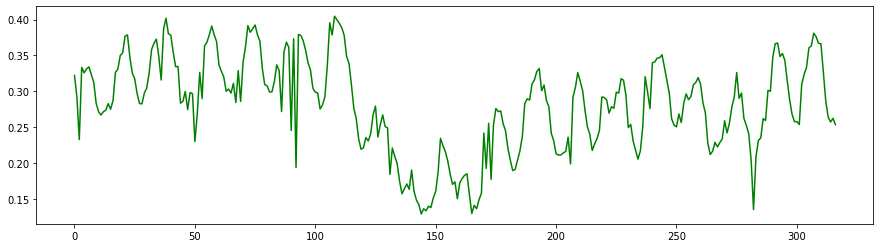

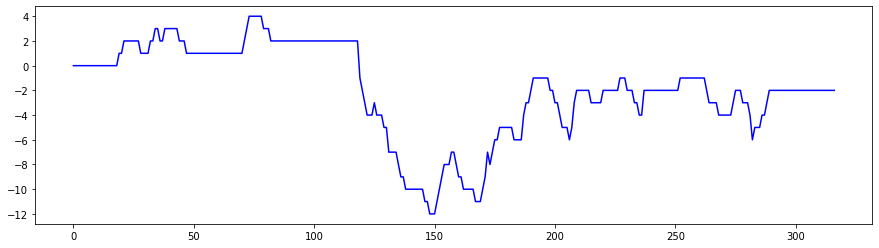

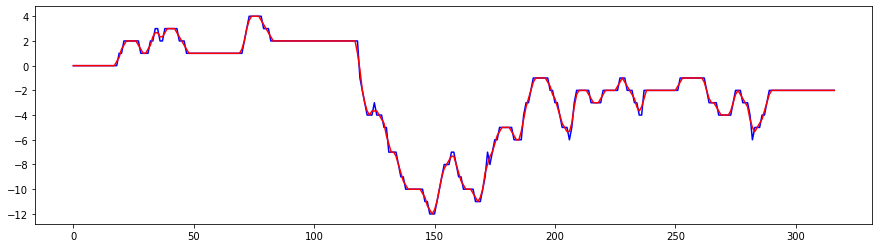

In [7]:
ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A01.nc")  # big impact 2007 ophtha dam area
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A02.nc")  # big impact 2007 ophtha dam area, but training done 2013, so recovery is shown
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A03.nc")  # near impact 2007 ophtha dam area, less impact in 2007
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A04.nc")  # open shrubland with wo euc? training period bad
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A05.nc")  # mulga area on road side? training period bad
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A06.nc")  # euc vic east yandi. gradual increasing... odd result? try train period
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A07.nc")  # yandi discharge south veg... good, but change in training period?
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A08.nc")   # yandi elephatn graveyard. good - 2007 decline

vec_summary = ds_change['summary'].median(['x', 'y']).data
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_summary, color='green')
plt.show()

vec_static = ds_change['static'].median(['x', 'y']).data
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static, color='blue')
plt.show()

vec_static_smooth = nrt.smooth_change(arr=vec_static)       
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static, color='blue')
plt.plot(vec_static_smooth, color='red')
plt.show()

In [273]:
from importlib import reload
reload(nrt)

<module 'nrt' from 'C:\\Users\\Lewis\\Documents\\GitHub\\tenement-tools\\modules\\nrt.py'>

## Apply rule 1: consequtives

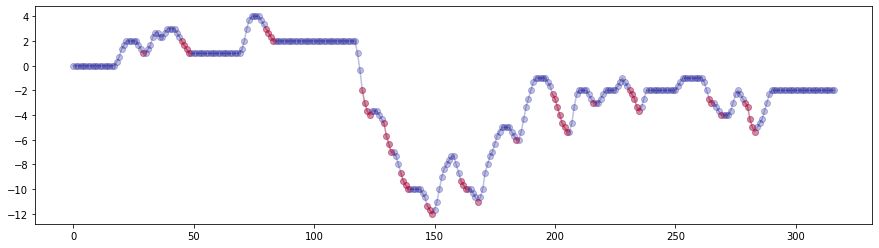

In [9]:
min_consequtives = 3
max_consequtives = 5
inc_plateaus_in_runs = True

# get inc, dec and stable counts
vec_rule_1 = nrt.apply_rule_one(arr=vec_static_smooth, 
                                direction='decline', 
                                min_consequtives=3, 
                                max_consequtives=None,
                                inc_plateaus=False)

fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static_smooth, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rule_1 >= 1, vec_static_smooth, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Apply rule 2: threshold

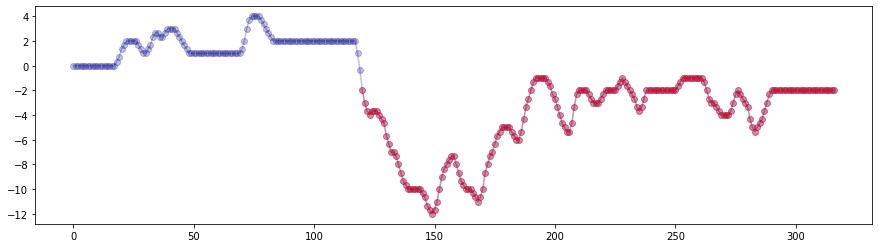

In [10]:
vec_rule_2 = nrt.apply_rule_two(vec_static_smooth, direction='decline', min_stdv=1, operator='<=')
#vec_rule_2_incline = apply_rule_two(yest, min_zone=1, operator='>=')

fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static_smooth, color='darkblue', marker='o', alpha=0.25)
plt.plot(vec_rule_2, color='red', marker='o', alpha=0.25)
plt.show()

## Apply rule 3: jumps

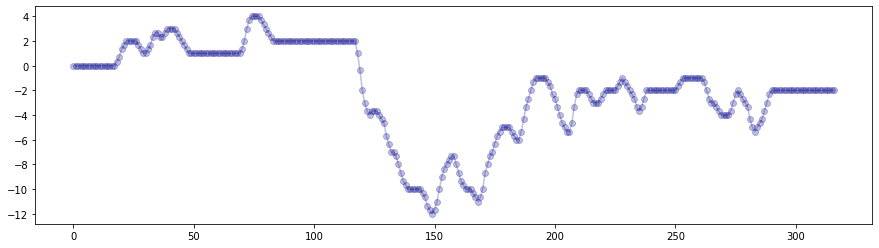

In [11]:
# temp - just testing
spiked = vec_static_smooth.copy()
#spiked[-10: -5] = spiked[-10: -5] - 8
#spiked[25: 30] = spiked[25: 30] - 4

# get num zones to jump
num_stdvs = nrt.get_stdv_from_zone(num_zones=1)

vec_rule_3 = nrt.apply_rule_three(spiked, direction='decline', num_stdv_jumped=num_stdvs, min_consequtives=3)
# #spike_inc = apply_rule_three(spiked, jump_direction='increase', jump_size=1, min_consequtives=3)

fig = plt.figure(figsize=(15, 4))
plt.plot(spiked, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rule_3 >= 1, spiked, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Apply rules 1, 2, 3: combined

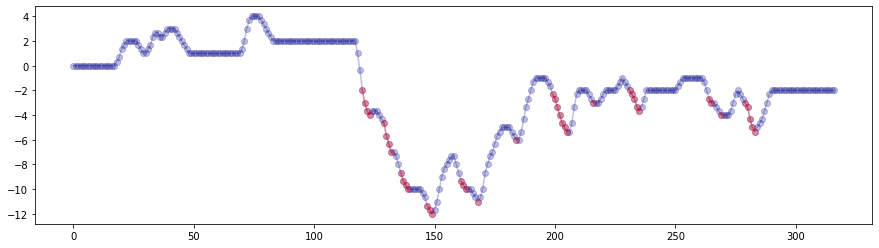

In [14]:
vec_rules_combo = nrt.apply_rule_combo(arr_r1=vec_rule_1, 
                                       arr_r2=vec_rule_2, 
                                       arr_r3=vec_rule_3, 
                                       ruleset='1&2|3')



fig = plt.figure(figsize=(15, 4))
plt.plot(spiked, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rules_combo >= 1, spiked, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Assign zone to rule output

In [16]:
# classify smoothed array into zone 0
vec_temp = np.abs(vec_static_smooth)

# zone 0 - from 0 to 1 (+/-)
zone_0 = np.where((vec_temp >= 0) & (vec_temp <= 1), 0, 0)

# zone 1 - between 1 and 3 (+/-)
zone_1 = np.where((vec_temp > 1) & (vec_temp <= 3), 1, 0)

# zone 2 - between 3 and 5 (+/-)
zone_2 = np.where((vec_temp > 3) & (vec_temp <= 5), 2, 0)

# zone 3 - between 5 and 7 (+/-)
zone_3 = np.where((vec_temp > 5) & (vec_temp <= 7), 3, 0)

# zone 4 - between 7 and 9 (+/-)
zone_4 = np.where((vec_temp > 7) & (vec_temp <= 9), 4, 0)

# zone 5 - between 9 and 11 (+/-)
zone_5 = np.where((vec_temp > 9) & (vec_temp <= 11), 5, 0)

# zone 6 - between 11 and 13 (+/-)
zone_6 = np.where((vec_temp > 11) & (vec_temp <= 13), 6, 0)

# zone 7 - between 13 and 15 (+/-)
zone_7 = np.where((vec_temp > 13) & (vec_temp <= 15), 7, 0)

# zone 8 - between 15 and 17 (+/-)
zone_8 = np.where((vec_temp > 15) & (vec_temp <= 17), 8, 0)

# zone 9 - between 17 and 19 (+/-)
zone_9 = np.where((vec_temp > 17) & (vec_temp <= 19), 9, 0)

# zone 10 - above 19 (+/-)
zone_10 = np.where(vec_temp > 19, 10, 0)

In [17]:
# simulate input
arr = vec_static_smooth.copy()

# set up zone ranges (stdvs)
zones = [
    [0, 1],    # zone 1 - from 0 to 1 (+/-)
    [1, 3],    # zone 2 - between 1 and 3 (+/-)
    [3, 5],    # zone 3 - between 3 and 5 (+/-)
    [5, 7],    # zone 4 - between 5 and 7 (+/-)
    [7, 9],    # zone 5 - between 7 and 9 (+/-)
    [9, 11],   # zone 6 - between 9 and 11 (+/-)
    [11, 13],  # zone 7 - between 11 and 13 (+/-)
    [13, 15],  # zone 8 - between 13 and 15 (+/-)
    [15, 17],  # zone 9 - between 15 and 17 (+/-)
    [17, 19],  # zone 10 - between 17 and 19 (+/-)
    [19]       # zone 11- above 19 (+/-)
]

# create template vector
vec_temp = np.full_like(arr, fill_value=np.nan)

# iter zones
for i, z in enumerate(zones, start=1):
    
    # 
    if i == 1:
        vec_temp[np.where((arr >= z[0]) & (arr <= z[1]))] = i
        vec_temp[np.where((arr < z[0]) & (arr >= z[1] * -1))] = i * -1
            
    elif i == 11:       
        vec_temp[np.where(arr > z[0])] = i
        vec_temp[np.where(arr < z[0] * -1)] = i * -1
        
    else:
        vec_temp[np.where((arr > z[0]) & (arr <= z[1]))] = i
        vec_temp[np.where((arr < z[0] * -1) & (arr >= z[1] * -1))] = i * -1
        
        

In [18]:
vec_temp

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  1., -1., -2., -2., -3., -3., -3., -3., -3., -3., -3., -3.,
       -4., -4., -4., -4., -5., -5., -5., -6., -6., -6., -6., -6., -6.,
       -6., -6., -6., -6., -7., -7., -7., -7., -6., -6., -5., -5., -5.,
       -5., -5., -5., -5., -5., -6., -6., -6., -6., -6., -6., -6., -6.,
       -6., -6., -5., -5., -5., -4., -4., -4., -4., -3., -3., -3

In [ ]:
# dont forget, you need second last image when alerting and displaying data

In [200]:
vec_temp_signed = vec_static_smooth.copy()
vec_temp_signed = np.where(np.sign(vec_temp_signed) == 0, 1, np.sign(vec_temp_signed))

In [202]:
vec_temp_signed * zones

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0., -0., -1., -1., -2., -2., -2., -2., -2., -2., -2., -2.,
       -3., -3., -3., -3., -4., -4., -4., -5., -5., -5., -5., -5., -5.,
       -5., -5., -5., -5., -6., -6., -6., -6., -5., -5., -4., -4., -4.,
       -4., -4., -4., -4., -4., -5., -5., -5., -5., -5., -5., -5., -5.,
       -5., -5., -4., -4., -4., -3., -3., -3., -3., -2., -2., -2

## Main function

In [ ]:
# bring it all together

In [ ]:
# for i in np.arange(0, len(vec_rule_1_decline)):
#     if i > 3:
    
#         vec_smooth = vec_static_smooth[0:i]
#         vec_rule = vec_rule_1_decline[0:i]
        
#         alarm = False
#         if vec_rule[-2] >= 1:
#             alarm = True
            
#         fig = plt.figure(figsize=(15, 4))
#         plt.plot(vec_smooth, color='darkblue', marker='o', alpha=0.25)
        
#         if alarm: 
#             plt.axvline(i - 2, color='black', linestyle='dashed')
        
#         plt.show()
#         plt.close()